In [ ]:
from google.colab import files

uploaded = files.upload()  


Saving birlesik_veri.csv to birlesik_veri.csv


In [9]:
# Manuel sütun isimlerini değiştir
df.rename(columns={'Ýl': 'İl'}, inplace=True)
df.set_index('İl', inplace=True)


In [5]:
print(df.columns.tolist())


['Ýl', 'Çöp ve çevresel atýk toplama hizmeti\n', 'Kanalizasyon hizmeti\n', 'Þebeke suyu hizmeti\n', 'Toplu taþýma hizmeti\n', 'Sosyal Güvenlik Kurumu hizmetleri\n', 'Saðlýk hizmetleri\n', 'Eðitim hizmetleri\n', 'Adli hizmetler\n', 'Asayiþ hizmetleri\n', 'Ulaþtýrma hizmetleri\n', 'Yol/kaldýrým yapýmý hizmeti\n', 'Iþýklandýrma hizmeti\n', 'Sokak levhalarý ve dýþ kapý numaralandýrma hizmetleri\n']


In [13]:
import pandas as pd

# Veri yükle
df = pd.read_csv('birlesik_veri.csv', sep=';', encoding='latin1')
df.columns = [col.strip() for col in df.columns]
df.set_index('Ýl', inplace=True)

# Temizlik fonksiyonu: sayısal olmayan karakterleri kaldır, virgülü nokta yap (decimal)
def temizle_ve_float_yap(x):
    if pd.isnull(x):
        return None
    # stringe çevir
    x = str(x)
    # sayısal karakterler dışındakileri temizle (ör: boşluk, alfabe vs)
    # burada sadece rakam, nokta ve virgül bırakıyoruz
    import re
    x = re.sub(r'[^0-9,.-]', '', x)
    # virgülü noktaya çevir (ondalık için)
    x = x.replace(',', '.')
    try:
        return float(x)
    except:
        return None

# Tüm sütunlar için temizleme uygula
for col in df.columns:
    df[col] = df[col].apply(temizle_ve_float_yap)

print(df.dtypes)  # Tekrar kontrol et
print(df.head())  # İlk 5 satıra bak

# Eksik değerleri kontrol et
print(df.isnull().sum())


Çöp ve çevresel atýk toplama hizmeti                     float64
Kanalizasyon hizmeti                                     float64
Þebeke suyu hizmeti                                      float64
Toplu taþýma hizmeti                                     float64
Sosyal Güvenlik Kurumu hizmetleri                        float64
Saðlýk hizmetleri                                        float64
Eðitim hizmetleri                                        float64
Adli hizmetler                                           float64
Asayiþ hizmetleri                                        float64
Ulaþtýrma hizmetleri                                     float64
Yol/kaldýrým yapýmý hizmeti                              float64
Iþýklandýrma hizmeti                                     float64
Sokak levhalarý ve dýþ kapý numaralandýrma hizmetleri    float64
dtype: object
                Çöp ve çevresel atýk toplama hizmeti  Kanalizasyon hizmeti  \
Ýl                                                             

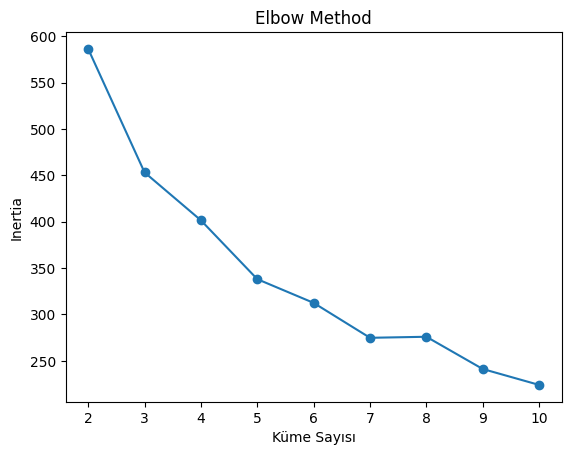

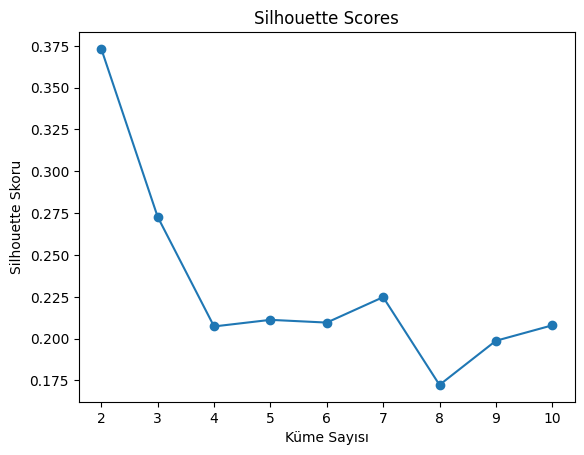

         Çöp ve çevresel atýk toplama hizmeti  Kanalizasyon hizmeti  \
Segment                                                               
0                                   69.026250             67.309583   
1                                   71.436316             66.966316   
2                                   76.694000             75.863500   
3                                   46.824444             48.020000   

         Þebeke suyu hizmeti  Toplu taþýma hizmeti  \
Segment                                              
0                  66.167083             62.606250   
1                  68.690000             58.083684   
2                  74.877500             66.679500   
3                  45.546111             43.897778   

         Sosyal Güvenlik Kurumu hizmetleri  Saðlýk hizmetleri  \
Segment                                                         
0                                81.241250          84.321667   
1                                62.329474          7

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Veriyi oku ve index ayarla
filename = 'birlesik_veri.csv'
df = pd.read_csv(filename, sep=';', encoding='latin1')
df.columns = [col.strip() for col in df.columns]  # sütun isimlerinden boşlukları temizle
df.set_index('Ýl', inplace=True)

# Virgülleri noktaya çevir ve float yap
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Ölçeklendirme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhouette Scores
sil_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, labels))

plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Küme Sayısı")
plt.ylabel("Silhouette Skoru")
plt.title("Silhouette Scores")
plt.show()

# Kümeleme (örnek k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_data)

# Segment ortalamaları
print(df.groupby('Segment').mean())

# PCA ile 2 boyutlu görselleştirme
pca = PCA(n_components=2)



In [18]:
df.index = df.index.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [19]:
for col in df.columns:
    print(col)


Çöp ve çevresel atýk toplama hizmeti
Kanalizasyon hizmeti
Þebeke suyu hizmeti
Toplu taþýma hizmeti
Sosyal Güvenlik Kurumu hizmetleri
Saðlýk hizmetleri
Eðitim hizmetleri
Adli hizmetler
Asayiþ hizmetleri
Ulaþtýrma hizmetleri
Yol/kaldýrým yapýmý hizmeti
Iþýklandýrma hizmeti
Sokak levhalarý ve dýþ kapý numaralandýrma hizmetleri
Segment


In [20]:
# Sütun isimlerini düzgün hale getirmek için manuel düzeltme
df.columns = [
    'Çöp ve çevresel atık toplama hizmeti',
    'Kanalizasyon hizmeti',
    'Şebeke suyu hizmeti',
    'Toplu taşıma hizmeti',
    'Sosyal Güvenlik Kurumu hizmetleri',
    'Sağlık hizmetleri',
    'Eğitim hizmetleri',
    'Adli hizmetler',
    'Asayiş hizmetleri',
    'Ulaştırma hizmetleri',
    'Yol/kaldırım yapımı hizmeti',
    'Işıklandırma hizmeti',
    'Sokak levhaları ve dış kapı numaralandırma hizmetleri',
    'Segment'  # Bu segment sütunu ise sonradan eklediğin kısım
]

print(df.columns)


Index(['Çöp ve çevresel atık toplama hizmeti', 'Kanalizasyon hizmeti',
       'Şebeke suyu hizmeti', 'Toplu taşıma hizmeti',
       'Sosyal Güvenlik Kurumu hizmetleri', 'Sağlık hizmetleri',
       'Eğitim hizmetleri', 'Adli hizmetler', 'Asayiş hizmetleri',
       'Ulaştırma hizmetleri', 'Yol/kaldırım yapımı hizmeti',
       'Işıklandırma hizmeti',
       'Sokak levhaları ve dış kapı numaralandırma hizmetleri', 'Segment'],
      dtype='object')


In [21]:
# İli indeks yapmadan direkt işle
# Böylece 'İl' sütun olarak kalır
print(df.columns)
print(df.head())


Index(['Çöp ve çevresel atık toplama hizmeti', 'Kanalizasyon hizmeti',
       'Şebeke suyu hizmeti', 'Toplu taşıma hizmeti',
       'Sosyal Güvenlik Kurumu hizmetleri', 'Sağlık hizmetleri',
       'Eğitim hizmetleri', 'Adli hizmetler', 'Asayiş hizmetleri',
       'Ulaştırma hizmetleri', 'Yol/kaldırım yapımı hizmeti',
       'Işıklandırma hizmeti',
       'Sokak levhaları ve dış kapı numaralandırma hizmetleri', 'Segment'],
      dtype='object')
                Çöp ve çevresel atık toplama hizmeti  Kanalizasyon hizmeti  \
Ýl                                                                           
Adana                                          69.50                 58.10   
Adyyaman                                       39.60                 36.60   
Afyonkarahisar                                 72.35                 76.15   
Aksaray                                        66.34                 62.91   
Amasya                                         79.27                 80.41   

     

In [22]:
df = df.reset_index()  # İndeksteki iller artık 'İl' sütunu olur
print(df.columns)      # Tüm sütunları gösterir
print(df.head())       # İlk birkaç satırı gösterir


Index(['Ýl', 'Çöp ve çevresel atık toplama hizmeti', 'Kanalizasyon hizmeti',
       'Şebeke suyu hizmeti', 'Toplu taşıma hizmeti',
       'Sosyal Güvenlik Kurumu hizmetleri', 'Sağlık hizmetleri',
       'Eğitim hizmetleri', 'Adli hizmetler', 'Asayiş hizmetleri',
       'Ulaştırma hizmetleri', 'Yol/kaldırım yapımı hizmeti',
       'Işıklandırma hizmeti',
       'Sokak levhaları ve dış kapı numaralandırma hizmetleri', 'Segment'],
      dtype='object')
               Ýl  Çöp ve çevresel atık toplama hizmeti  Kanalizasyon hizmeti  \
0           Adana                                 69.50                 58.10   
1        Adyyaman                                 39.60                 36.60   
2  Afyonkarahisar                                 72.35                 76.15   
3         Aksaray                                 66.34                 62.91   
4          Amasya                                 79.27                 80.41   

   Şebeke suyu hizmeti  Toplu taşıma hizmeti  \
0          

In [23]:
df.rename(columns={'Ýl': 'ıl'}, inplace=True)
print(df.columns)
print(df.head())


Index(['ıl', 'Çöp ve çevresel atık toplama hizmeti', 'Kanalizasyon hizmeti',
       'Şebeke suyu hizmeti', 'Toplu taşıma hizmeti',
       'Sosyal Güvenlik Kurumu hizmetleri', 'Sağlık hizmetleri',
       'Eğitim hizmetleri', 'Adli hizmetler', 'Asayiş hizmetleri',
       'Ulaştırma hizmetleri', 'Yol/kaldırım yapımı hizmeti',
       'Işıklandırma hizmeti',
       'Sokak levhaları ve dış kapı numaralandırma hizmetleri', 'Segment'],
      dtype='object')
               ıl  Çöp ve çevresel atık toplama hizmeti  Kanalizasyon hizmeti  \
0           Adana                                 69.50                 58.10   
1        Adyyaman                                 39.60                 36.60   
2  Afyonkarahisar                                 72.35                 76.15   
3         Aksaray                                 66.34                 62.91   
4          Amasya                                 79.27                 80.41   

   Şebeke suyu hizmeti  Toplu taşıma hizmeti  \
0          

In [24]:
# Segment isimleri
segment_names = {
    0: 'Yüksek Hizmet Kalitesi',
    1: 'Orta Hizmet Kalitesi',
    2: 'Düşük Hizmet Kalitesi',
    3: 'Çok Düşük Hizmet Kalitesi'
}

# Yeni bir sütun ekleyelim, segment isimleri olarak
df['Segment İsmi'] = df['Segment'].map(segment_names)

# Sonuçları göster
print(df[['ıl', 'Segment', 'Segment İsmi']].head(10))


               ıl  Segment               Segment İsmi
0           Adana        1       Orta Hizmet Kalitesi
1        Adyyaman        3  Çok Düşük Hizmet Kalitesi
2  Afyonkarahisar        0     Yüksek Hizmet Kalitesi
3         Aksaray        0     Yüksek Hizmet Kalitesi
4          Amasya        0     Yüksek Hizmet Kalitesi
5          Ankara        1       Orta Hizmet Kalitesi
6         Antalya        1       Orta Hizmet Kalitesi
7         Ardahan        3  Çok Düşük Hizmet Kalitesi
8          Artvin        0     Yüksek Hizmet Kalitesi
9           Aydyn        2      Düşük Hizmet Kalitesi


In [25]:
# Türkçe karakter düzeltme fonksiyonu
def turkce_karakter_duzelt(text):
    replacements = {
        'Ý': 'İ',
        'ý': 'ı',
        'þ': 'ş',
        'Þ': 'Ş',
        'ð': 'ğ',
        'Ð': 'Ğ',
        'ü': 'ü',
        'Ü': 'Ü',
        'ö': 'ö',
        'Ö': 'Ö',
        'ç': 'ç',
        'Ç': 'Ç'
    }
    for eski, yeni in replacements.items():
        text = text.replace(eski, yeni)
    return text

# 'ıl' sütunundaki şehir isimlerini düzelt
df['ıl'] = df['ıl'].apply(turkce_karakter_duzelt)

print(df[['ıl', 'Segment', 'Segment İsmi']].head(10))


               ıl  Segment               Segment İsmi
0           Adana        1       Orta Hizmet Kalitesi
1        Adyyaman        3  Çok Düşük Hizmet Kalitesi
2  Afyonkarahisar        0     Yüksek Hizmet Kalitesi
3         Aksaray        0     Yüksek Hizmet Kalitesi
4          Amasya        0     Yüksek Hizmet Kalitesi
5          Ankara        1       Orta Hizmet Kalitesi
6         Antalya        1       Orta Hizmet Kalitesi
7         Ardahan        3  Çok Düşük Hizmet Kalitesi
8          Artvin        0     Yüksek Hizmet Kalitesi
9           Aydyn        2      Düşük Hizmet Kalitesi


                Çöp ve çevresel atık toplama hizmeti  Kanalizasyon hizmeti  \
ıl                                                                           
Adana                                          69.50                 58.10   
Adyyaman                                       39.60                 36.60   
Afyonkarahisar                                 72.35                 76.15   
Aksaray                                        66.34                 62.91   
Amasya                                         79.27                 80.41   
...                                              ...                   ...   
Corum                                          78.90                 81.64   
Ystanbul                                       82.12                 81.30   
Yzmir                                          66.78                 64.41   
anlyurfa                                       66.70                 70.95   
yrnak                                          56.27            

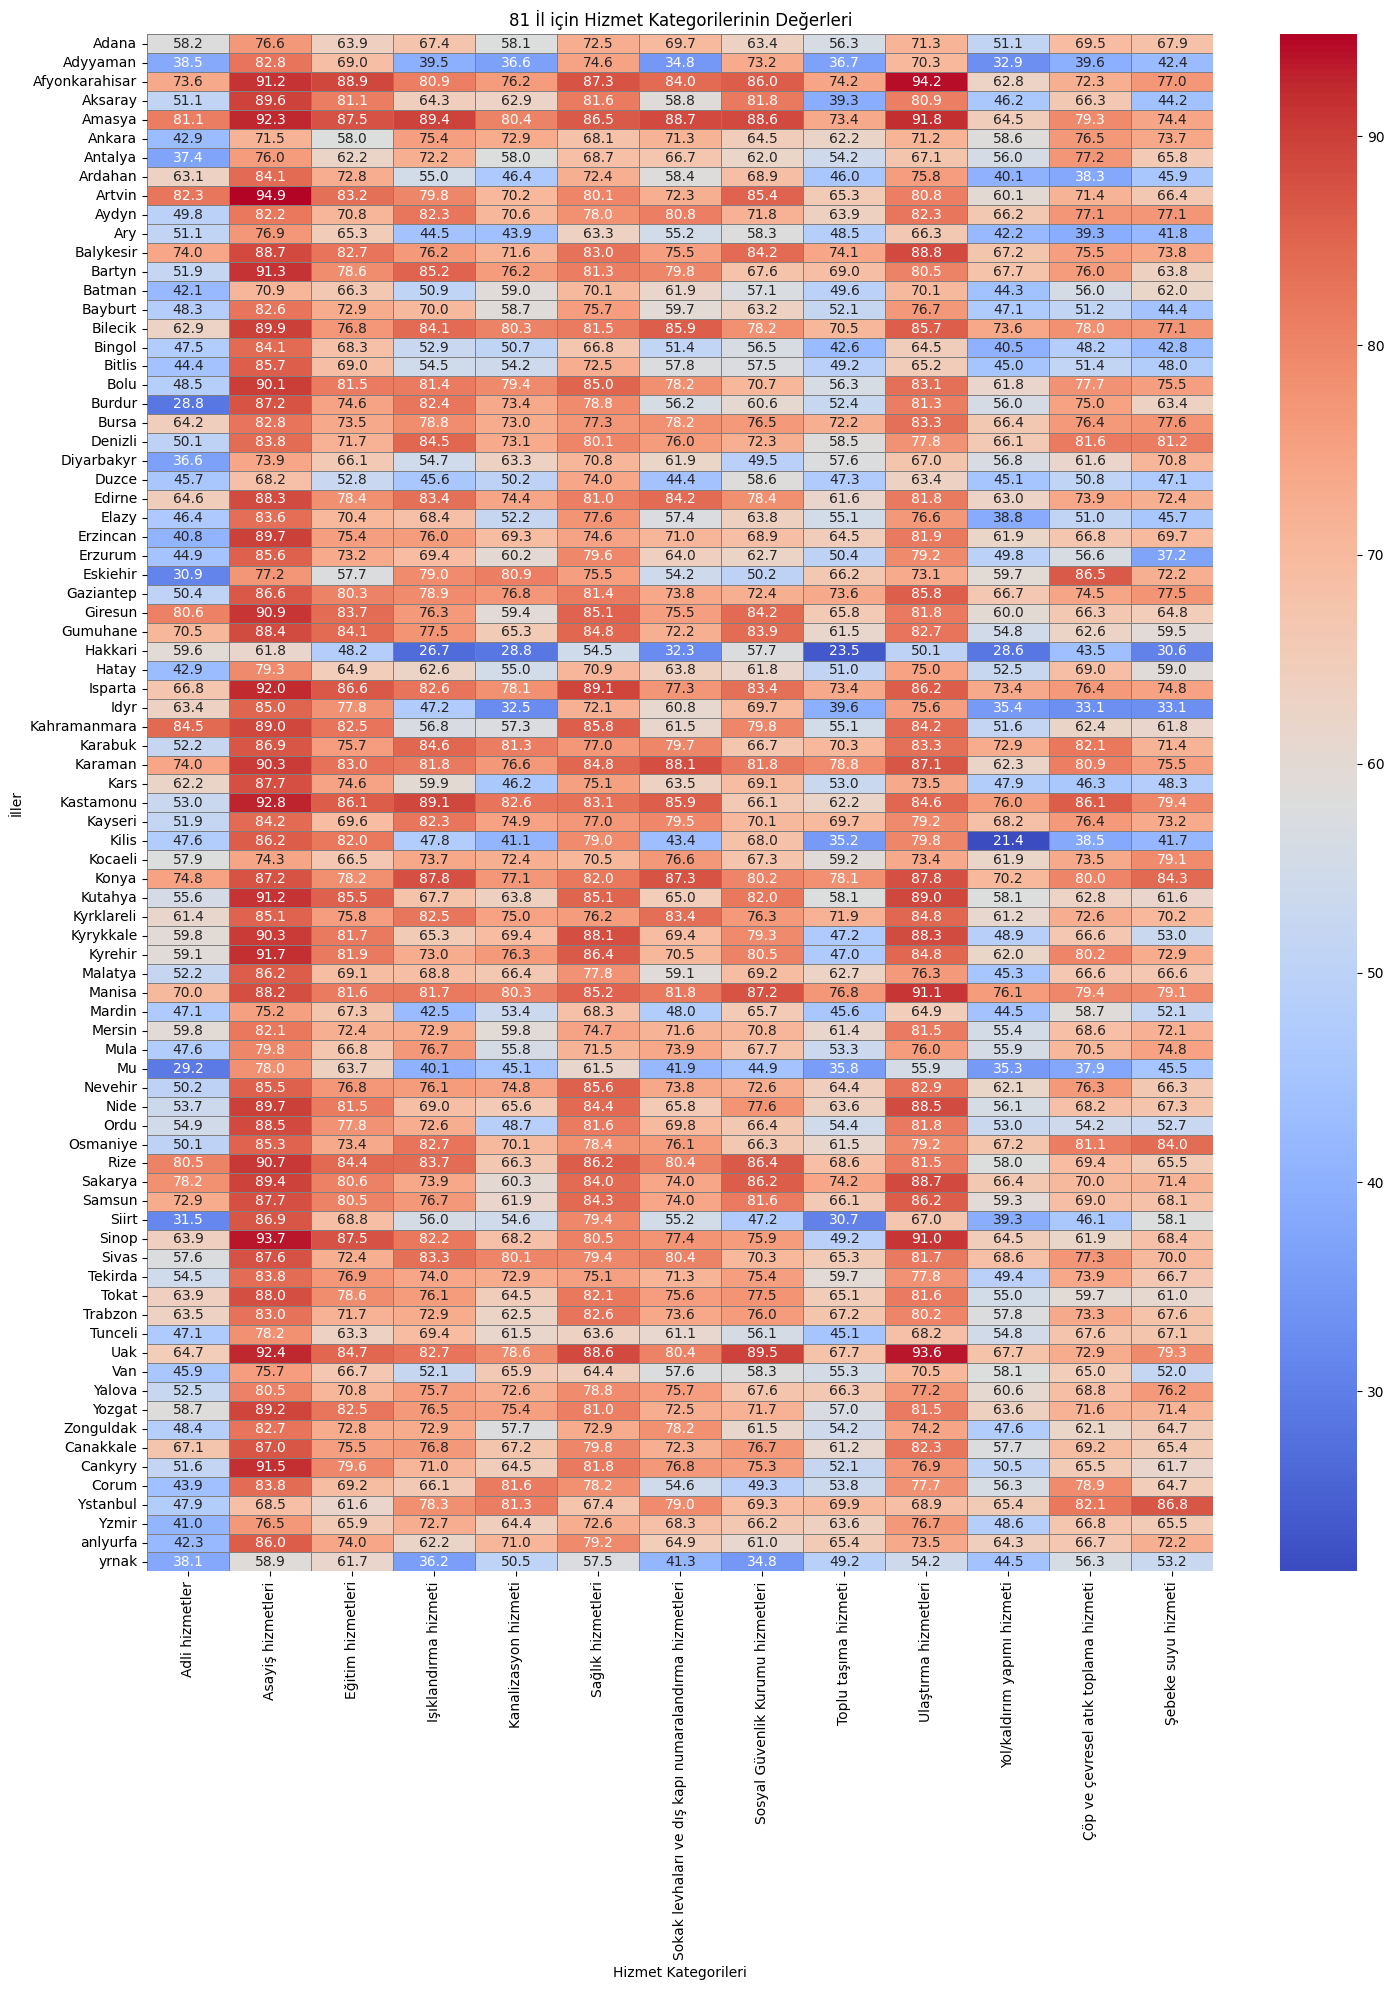

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tablo
df_tablo = df.set_index('ıl')
print(df_tablo)

# Isı haritası için sadece hizmet kalitesi sütunları
hizmet_kategorileri = df.columns.difference(['ıl', 'Segment', 'Segment İsmi'])
data_heatmap = df_tablo[hizmet_kategorileri]

plt.figure(figsize=(15, 20))
sns.heatmap(data_heatmap, cmap='coolwarm', linewidths=0.5, linecolor='gray', annot=True, fmt=".1f")
plt.title('81 İl için Hizmet Kategorilerinin Değerleri')
plt.ylabel('İller')
plt.xlabel('Hizmet Kategorileri')
plt.tight_layout()
plt.show()


In [28]:
# Hizmet kategorisi sütunları (Segment ve il hariç)
hizmet_kategorileri = df.columns.difference(['ıl', 'Segment', 'Segment İsmi'])

# Yaşam kalitesi skoru = tüm hizmet sütunlarının ortalaması
df['Yaşam Kalitesi Skoru'] = df[hizmet_kategorileri].mean(axis=1)

# En yüksek yaşam kalitesinden en düşüğe göre sırala
df_sirali = df.sort_values(by='Yaşam Kalitesi Skoru', ascending=False)

# Sadece il, skor ve segment isimlerini göster
print(df_sirali[['ıl', 'Yaşam Kalitesi Skoru', 'Segment İsmi']])


                ıl  Yaşam Kalitesi Skoru               Segment İsmi
4           Amasya             82.910769     Yüksek Hizmet Kalitesi
50          Manisa             81.422308      Düşük Hizmet Kalitesi
44           Konya             81.157692      Düşük Hizmet Kalitesi
2   Afyonkarahisar             80.656923     Yüksek Hizmet Kalitesi
38         Karaman             80.390000     Yüksek Hizmet Kalitesi
..             ...                   ...                        ...
23           Duzce             53.309231  Çok Düşük Hizmet Kalitesi
1         Adyyaman             51.607692  Çok Düşük Hizmet Kalitesi
80           yrnak             48.942308  Çok Düşük Hizmet Kalitesi
54              Mu             47.300769  Çok Düşük Hizmet Kalitesi
32         Hakkari             41.995385  Çok Düşük Hizmet Kalitesi

[81 rows x 3 columns]


In [31]:
# Örneğin 'ıl' sütunundaki şehir isimlerinde değişiklik yapmak için:
df['ıl'] = df['ıl'].str.replace('ş', 's').str.replace('Ş', 'S').str.replace('ı', 'i').str.replace('İ', 'I')


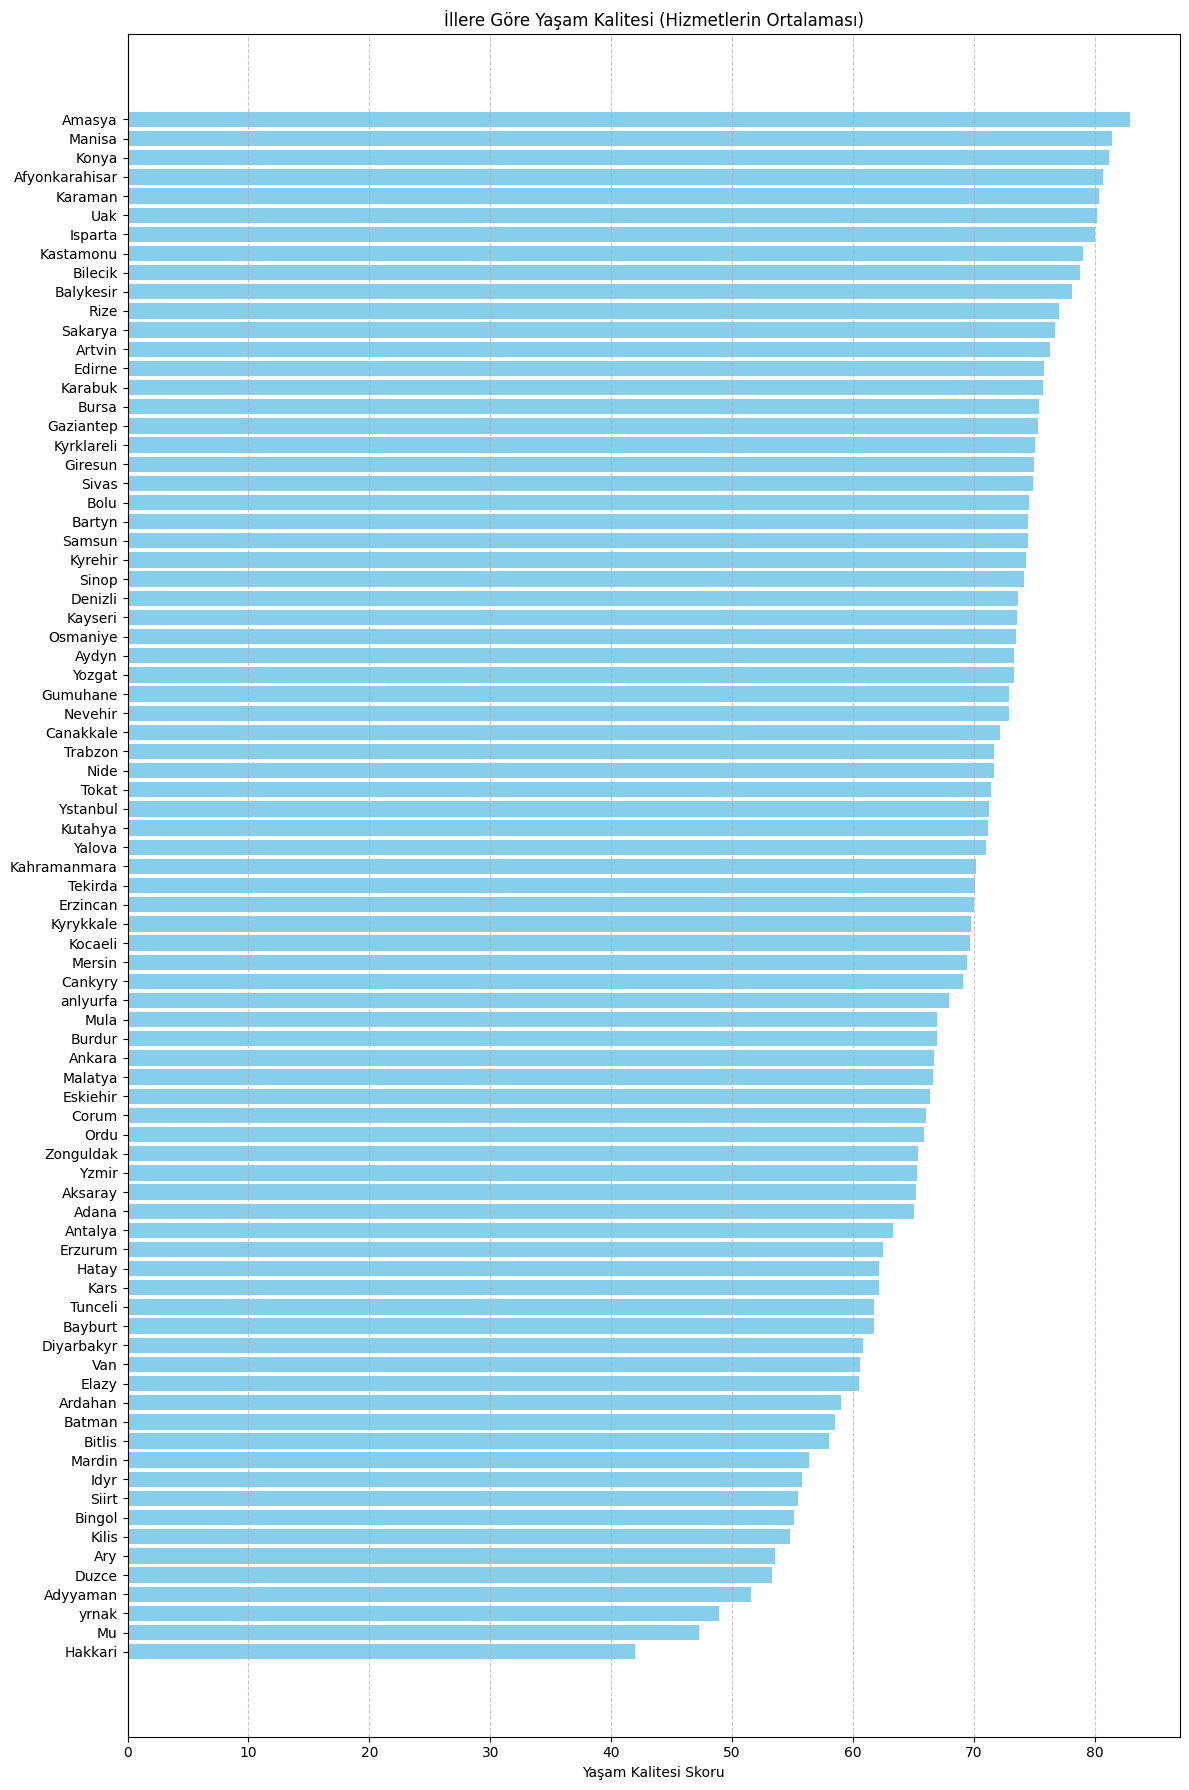

In [32]:
import matplotlib.pyplot as plt

# Hizmet kategorileri hariç sütunlar (il, segment, segment ismi)
hizmet_kategorileri = df.columns.difference(['ıl', 'Segment', 'Segment İsmi'])

# Yaşam Kalitesi Skoru oluştur
df['Yaşam Kalitesi Skoru'] = df[hizmet_kategorileri].mean(axis=1)

# Skora göre sıralama
df_sirali = df.sort_values(by='Yaşam Kalitesi Skoru', ascending=True)  # Barh için küçükten büyüğe sıralama

plt.figure(figsize=(12, 18))
plt.barh(df_sirali['ıl'], df_sirali['Yaşam Kalitesi Skoru'], color='skyblue')
plt.xlabel('Yaşam Kalitesi Skoru')
plt.title('İllere Göre Yaşam Kalitesi (Hizmetlerin Ortalaması)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
segment_name_counts = df['Segment İsmi'].value_counts()

print(segment_name_counts)


Segment İsmi
Yüksek Hizmet Kalitesi       24
Düşük Hizmet Kalitesi        20
Orta Hizmet Kalitesi         19
Çok Düşük Hizmet Kalitesi    18
Name: count, dtype: int64


In [34]:
# Segment isimlerine göre şehirleri grupla
segment_city_groups = df.groupby('Segment İsmi')['ıl'].apply(list)

# Yazdırma
for segment, cities in segment_city_groups.items():
    print(f"{segment} ({len(cities)} il):")
    print(", ".join(cities))
    print()


Düşük Hizmet Kalitesi (20 il):
Aydyn, Bartyn, Bilecik, Bolu, Bursa, Denizli, Edirne, Erzincan, Gaziantep, Karabuk, Kastamonu, Kayseri, Konya, Kyrklareli, Manisa, Nevehir, Osmaniye, Sivas, Yalova, Yozgat

Orta Hizmet Kalitesi (19 il):
Adana, Ankara, Antalya, Burdur, Diyarbakyr, Eskiehir, Hatay, Kocaeli, Malatya, Mersin, Mula, Tekirda, Tunceli, Van, Zonguldak, Corum, Ystanbul, Yzmir, anlyurfa

Yüksek Hizmet Kalitesi (24 il):
Afyonkarahisar, Aksaray, Amasya, Artvin, Balykesir, Giresun, Gumuhane, Isparta, Kahramanmara, Karaman, Kutahya, Kyrykkale, Kyrehir, Nide, Ordu, Rize, Sakarya, Samsun, Sinop, Tokat, Trabzon, Uak, Canakkale, Cankyry

Çok Düşük Hizmet Kalitesi (18 il):
Adyyaman, Ardahan, Ary, Batman, Bayburt, Bingol, Bitlis, Duzce, Elazy, Erzurum, Hakkari, Idyr, Kars, Kilis, Mardin, Mu, Siirt, yrnak

